<a href="https://colab.research.google.com/github/PhamQuocDatAI/PTDL-with-Python/blob/master/huong_dan_kiem_dinh_z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HƯỚNG DẪN SUY DIỄN THỐNG KÊ BẰNG GÓI STATS CỦA THƯ VIỆN SCIPY

1. Các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Thiết lập định dạng hình ảnh

In [2]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')   

3. Tắt các cảnh báo của scipy

In [3]:
warnings.filterwarnings('ignore')

4. Một số lưu ý khi kiểm định giả thuyết trong thống kê suy diễn

(1) Cỡ mẫu thường phải đủ lớn ($n \geq 30$) để có ý nghĩa thống kê

(2) Các mẫu quan sát được (sample observations) phải được lựa chọn ngẫu nhiên từ quần thể

(3) Các đại lượng như trung bình mẫu (sample mean), độ lệch chuẩn của mẫu (standard deviation), phương sai mẫu (sample variance) được tính từ tập mẫu quan sát được.

(4) Giả định rằng quần thể được nghiên cứu lấy mẫu xấp xỉ với phân phối chuẩn.

5. Các bước thực hiện kiểm định giả thuyết (sử dụng kiểm định z)

Bước 1: Thực hiện các phép đo, hay thu thập dữ liệu quan sát

Bước 2: Phát biểu giả thuyết $H_{0}$ và giả thuyết thay thế $H_{a}$

Bước 3: Xác định mức $\alpha$ (hay khoảng tin cậy)

Bước 4: Lấy mẫu và tính toán các đại lượng thống kê của mẫu

Bước 5: Thực hiện kiểm định z (z-test)

Bước 6: Kết luận dựa vào kết quả kiểm định

KIỂM ĐỊNH GIẢ THUYẾT MỘT ĐUÔI 

1. Kỹ thuật sinh dữ liệu ngẫu nhiên

Sinh các mẫu ngẫu nhiên lấy ra từ phân phối chuẩn bằng hàm random.normal() với các tham số:

- mean: giá trị trung bình của quần thể

- scale: độ lệch chuẩn của quần thể (không âm)

- size: kích thước mẫu

In [5]:
#Sinh ngẫu nhiên 1000 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 1000
samples = np.random.normal(mean, std, N)
samples

array([0.94206283, 0.95835255, 1.07586515, 1.00799984, 0.98264631,
       0.90957569, 1.05703074, 1.02736484, 1.10902144, 1.11144588,
       0.98252202, 1.10236271, 1.07214693, 1.02967279, 0.893123  ,
       0.947111  , 0.99569032, 0.92616721, 0.85984673, 1.01643116,
       0.87543531, 0.80687556, 1.11068663, 1.08929066, 1.01341796,
       1.01699844, 1.11476196, 0.8927089 , 0.88777424, 1.01338404,
       1.08188929, 0.95799487, 1.14281872, 1.04495632, 1.00905771,
       1.04076641, 0.96308587, 0.77788402, 0.90418343, 0.82209687,
       0.95653345, 0.87139846, 0.97121025, 0.84325835, 0.87979818,
       1.26659441, 0.83627676, 1.07657211, 1.00603556, 0.97145229,
       0.88353605, 0.92238686, 0.90198293, 0.95033354, 1.02733504,
       0.98209186, 0.94808416, 0.8769405 , 1.00875521, 1.16753033,
       1.12360466, 0.92464715, 1.13392229, 0.96681247, 0.97118794,
       1.05589332, 1.0064552 , 1.06771787, 1.02674534, 0.99961984,
       1.11037509, 1.0054395 , 1.05162376, 0.8303369 , 0.76202

In [6]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[0.94206283 0.95835255 1.07586515 1.00799984 0.98264631 0.90957569
 1.05703074 1.02736484 1.10902144 1.11144588]


In [7]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.3068638700333444
Min:  0.6671924701194132


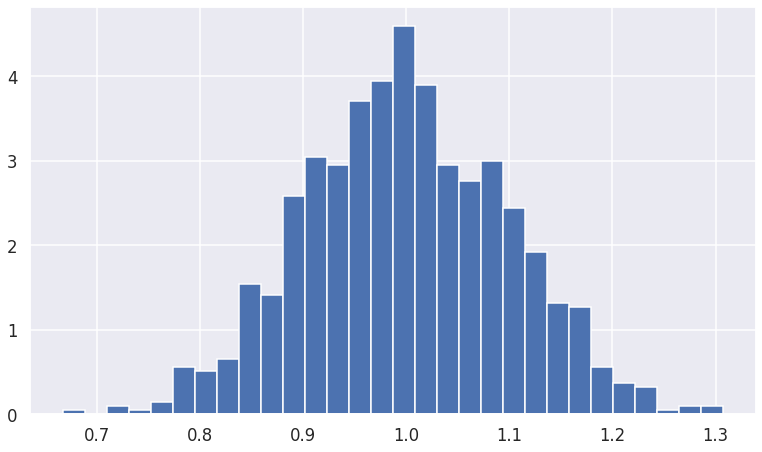

In [8]:
#Vẽ histogram của mẫu vừa được sinh ngẫu nhiên
plt.hist(samples, 30, density=True)
plt.show()

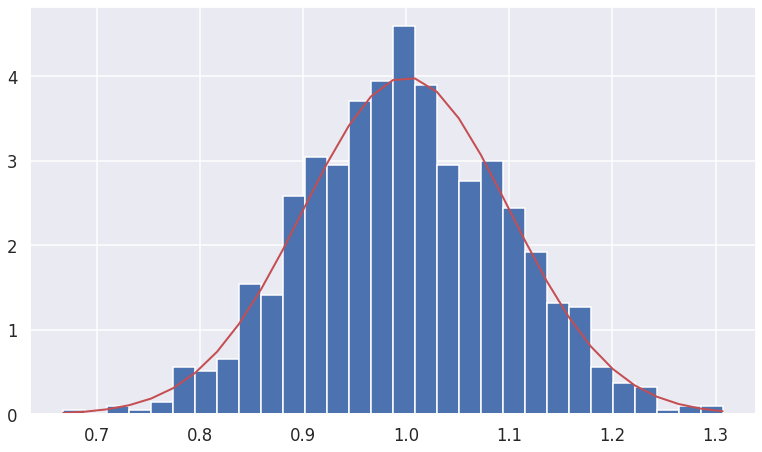

In [9]:
#Vẽ đường phân phối chuẩn cùng với histogram
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

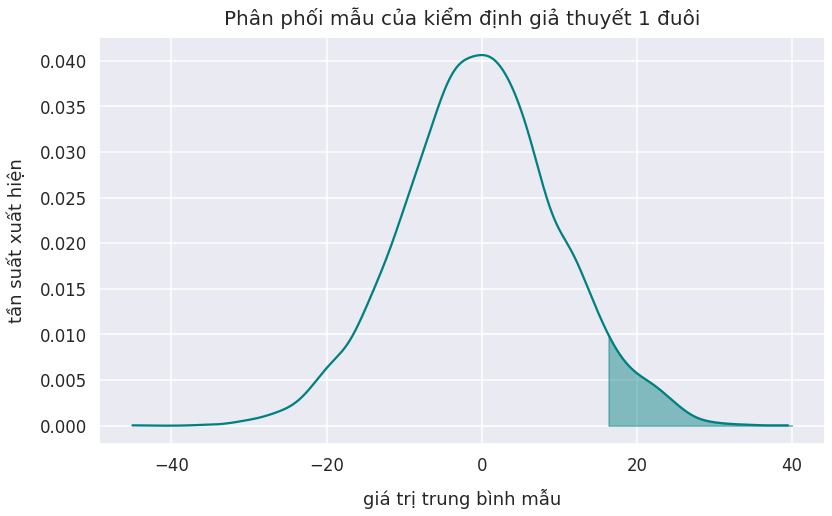

In [10]:
#Sinh ngẫu nhiên 6000 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=6000)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 10000 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);

2. Hình minh họa các kiểm định 1-đuôi, 2-đuôi

In [11]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [12]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032937/Screenshot39.png", width=300, height=300)

In [13]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)t

3. Xây dựng một kiểm định z cụ thể với số liệu được sinh ngẫu nhiên theo phân phối chuẩn

Bài toán: Giả sử lấy ra ngẫu nhiên 50 học sinh đang theo học chương trình tài năng và có IQ trung bình của nhóm này là 110. Biết giá trị trung bình của quần thể là 100 và độ lệch chuẩn là 15. Liệu với độ tin cậy là 95% (hay hệ số sig - significance level) - 5%) có thể nhận định học sinh theo học chương trình tài năng nói trên thông minh hơn học sinh thông thường hay không? 

Xây dựng giả thuyết

$$H_{0}: \mu = 100$$

Giả thuyết thay thế: 

$$H_{a}: \mu > 100 $$

với:

- Hệ số sig = 0.05
- Chỉ số z tương ứng với hệ số sig ở trên là 1.645

Công thức:
$$Z = \frac{(\overline{\rm X} - \mu)}{(\sigma / \sqrt{n})}$$

Áp dụng với các giá trị nêu trên:

- $\overline{\rm X} = 110$
- $\mu = 100$
- $\sigma = 15$
- $\alpha = 0.05$
- $n =50$

$$Z = \frac{(110 - 100)}{(15 / \sqrt{50})} = 4.71$$

Giá trị z = 4.71 > 1.645 nên có bằng chứng để bác bỏ giả thuyết $H_{0}$


Lập trình Python cho bài toán nêu trên

In [14]:
#Sinh ngẫu nhiên một mẫu 50 phần tử có trung bình mẫu là 110, độ lệch chuẩn là 15
samples = np.random.normal(110, 15, 50)
print(samples[:10])

[117.99631167 117.68612018 103.17254932 100.103978   132.21966925
 136.75000023 136.69707224  97.53357017  79.52221023  93.9146023 ]


In [15]:
#Xác định các thông số
null_mean = 100
alpha = 0.05

In [16]:
#Kiểm định z
ztest_Score, p_value= ztest(samples, value = null_mean, alternative='larger')
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

Có bằng chứng để bác bỏ giả thuyết H0


Kiểm định giả thuyết 2-đuôi

Một cách tổng quát, giả sử chúng ta có 2 quần thể độc lập và tuân theo phân phối chuẩn. Lấy ra 2 mẫu ngẫu nhiên tử 2 quần thể này.

Xây dựng giả thuyết:

$$H_{0}: \mu_{1} = \mu_{2}$$

Giả thuyết thay thế:

$$H_{a}: \mu_{1} \neq \mu_{2}$$

Thực hiện kiểm định z và so sánh với giá trị $z_{\frac{\alpha}{2}}$ để đi đến kết luận cuối cùng.

In [18]:
#Lập trình python minh họa
#Sinh ngẫu nhiên sample 1 có 50 phần tử với mean = 15 std = 6
samples_1 = np.random.normal(15, 6, 50)
samples_1

array([ 3.17595063, -0.22663486, 11.31176789,  9.76262642, 20.78448601,
        7.31621018, 15.86413017,  9.6817565 , 14.85846961, 15.58196907,
       16.47399297, 12.33613976, 19.42943732, 19.8387419 , 14.11137792,
       16.55177335, 10.33443354, 13.30787188, 15.21961715, 14.40641622,
       14.34092216, 19.27761257, 26.67460114, 14.30196367, 16.30274302,
        7.67190383, 15.64237198, 10.16610579, 14.52503574,  9.9884268 ,
        1.23202816, 16.8488985 ,  6.03745386,  9.11665279,  7.74746565,
       25.43897678, 24.66443827, 11.57883679, 16.09362103, 14.81176257,
        7.83795809,  8.544248  , 10.86660045, 21.38918401, 26.11308531,
       24.90278694, 20.37845826, 11.45713564, 12.54839363, 14.44247942])

In [19]:
print(samples_1[:10])

[ 3.17595063 -0.22663486 11.31176789  9.76262642 20.78448601  7.31621018
 15.86413017  9.6817565  14.85846961 15.58196907]


In [20]:
#Sinh ngẫu nhiên sample 2 có 60 phần tử với mean = 19 std = 7
samples_2 = np.random.normal(19, 7, 60)
samples_2

array([25.6241277 , 25.46676325, 18.71778593, 22.75785122, 19.76867283,
       14.76570552, 10.33243641, 20.40892581, 17.9534719 , 12.52922271,
       19.46084316, 19.41784403, 12.68131958, 24.21576661, 23.47552035,
       26.15360292, 29.27020308, 20.80259813, 10.10633657,  9.81734465,
       17.83741565, 29.6197166 , 26.42451933, 20.54785099, 22.07254801,
       25.10879436, 20.39618962, 21.14259917, 19.10319603, 32.54623954,
       19.38661097, 22.20834068, 23.63930838, 15.57044581, 13.08649948,
       25.02427929, 26.26946461, 27.00935113, 22.36865458, 13.67339991,
       18.33434416, 11.56855702, 13.10981732, 22.48389453, 19.51586971,
       17.73679125, 20.31785286, 21.96515475, 23.85306956, 20.29994839,
       12.76997639, 28.95879653, 23.00275646, 16.21818756, 19.31280227,
        6.53233261, 22.58149528, 26.6632862 , 20.07120869, 13.52087831])

In [21]:
print(samples_1[:10])

[ 3.17595063 -0.22663486 11.31176789  9.76262642 20.78448601  7.31621018
 15.86413017  9.6817565  14.85846961 15.58196907]


In [22]:
#Kiểm định giả thuyết 
alpha = 0.05
ztest_score, p_value = ztest(x1 = samples_1, x2 = samples_2, value = 15 - 19, alternative = 'two-sided')
print('z = ', ztest_score, '; p = ', p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

z =  -1.8632845638699325 ; p =  0.06242224072739755
Chưa có bằng chứng để bác bỏ giả thuyết H0
